In [453]:
import math
import graphviz
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import copy

## Implementacao de uma Estrutura de Dados Grafo seguindo uma lista de adjacencias

Decidimos construir a nossa Estrutura de Dados para o Grafo do inicio em vez de seguir o que nos foi mostrado na aula, de forma a que pudessemos perceber melhor como a Programacao Orientada para Objetos funciona em python e tambem para utilizarmos lista de adjacencias em vez de mapa de adjacencias.<br><br><br>
##### Porque optamos por lista de adjacencias?
Apesar de um mapa de adjacencias possuir custos menores para certas operacoes, a lista de adjacencias permite-nos usar a biblioteca networkx para representar o nosso grafo, desta forma, conseguimos obter um trabalho mais apelativo.



In [454]:
class Vertice:
    def __init__(self, n):
        self.ID = n
        self.incoming = [] #Lista de Arestas incoming
        self.outgoing = [] #Lista de Arestas outgoing
    def __str__(self):
        return str(self.ID)
    def __eq__(self, other):
        return self.ID == other
    def __hash__(self):
        return hash(id(self))
    def val(self):
        return int(str(self.ID))
    def grau_incoming(self):
        return len(self.incoming)
    def grau_outgoing(self):
        return len(self.outgoing)
    def incoming_vertices(self):
        c=[]
        for a in self.incoming:
            c.append(a.oposto(self).ID)
        return c


In [455]:
class Aresta:
    def __init__(self,frm : Vertice,to : Vertice,w=0,line=0):
        self.origin : Vertice = frm
        self.destination : Vertice = to
        self.weight = w
        self.line = line
    def __str__(self):
        return "({0} -> {1}): {2}".format(self.origin.ID, self.destination.ID, self.weight)
    def __eq__(self, other):
        return self.origin == other.origin and self.destination == other.destination and self.weight == other.weight
    def __hash__(self):
        return hash( (self.origin, self.destination) )
    def setWeight(self,newW):
        self.weight = newW
    def oposto(self, v):
        return self.origin if v is self.destination else self.destination
    def pontos(self):
        return self.origin, self.destination

In [456]:

class Grafo: #Baseado em Lista de Adjacencias
    def __init__(self):
        self.vertices = []

    def addVertice(self,v : Vertice):
        self.vertices.append(v)

    def addVertice(self,n : int):
        self.vertices.append(Vertice(n))
    def getVertice(self, n : int) -> Vertice:
        for v in self.vertices:
            if v.ID == n:
                return v
        return None
    def addAresta(self, frm:Vertice, to:Vertice, w=0):
        if frm not in self.vertices:
            self.addVertice(frm)
        if to not in self.vertices:
            self.addVertice(to)
        f = self.getVertice(frm.ID)
        t = self.getVertice(to.ID)
        aresta : Aresta = Aresta(f,t,w)
        f.outgoing.append(aresta)
        t.incoming.append(aresta)
    def getAresta(self,n1:int,n2:int) -> Aresta:
        v : Vertice = self.getVertice(n1)
        for a in v.outgoing:
            if a.destination.ID == n2:
                return a
        return None
    def removeAresta(self,frm:int, to:int):
        v :Vertice = self.getVertice(frm)
        v2:Vertice = self.getVertice(to)
        for a in v.outgoing:
            if a.destination.ID == to:
                v.outgoing.remove(a)

        for a in v2.incoming:
            if a.origin == frm:
                v2.incoming.remove(a)
                return a.weight
        return None
    def getNextNodes(self, n: int):
        c = {}
        v :Vertice = self.getVertice(n)
        arestas = v.outgoing
        for a  in arestas:
            c[str(a.destination)] = a.weight
        return c
    def getDistance(self,p):
        c =0
        for i in range(len(p)-1):
            a = self.getAresta(p[i],p[i+1])
            if a is None: return math.inf
            c+= a.weight
        return c
    def adj_list(self):
        dic ={}
        for v in self.vertices:
            dic[v.ID] = v.incoming_vertices()
        return dic

    def plot(self, nodeSize=100, fontSize=8):
        graph = nx.Graph(self.adj_list())
        nodeColors=[]
        for v in graph.nodes:
            if graph.degree[v] > 4:
                nodeColors.append('red')
            elif graph.degree[v] > 2:
                nodeColors.append('pink')
            else:
                nodeColors.append('cornflowerblue')
        pos = nx.drawing.layout.kamada_kawai_layout(graph)
        nx.draw(graph,pos, with_labels=True, node_size = nodeSize, font_size=fontSize, node_color=nodeColors)
        plt.show()

    def plot_path(self, path, nodeSize=100, fontSize=8):
        graph = nx.Graph(self.adj_list())
        nodeColors=[]
        for v in graph.nodes:
            if v in path:
                nodeColors.append('orange')
            elif graph.degree[v] > 4:
                nodeColors.append('red')
            elif graph.degree[v] > 2:
                nodeColors.append('pink')
            else:
                nodeColors.append('cornflowerblue')
        pos = nx.drawing.layout.kamada_kawai_layout(graph)
        nx.draw(graph,pos, with_labels=True, node_size = nodeSize, font_size=fontSize, node_color=nodeColors)
        plt.show()
    def __str__(self):
        s = ""
        for v in self.vertices:
            s+= str(v) +": \n"
            for i in v.incoming:
                s+= str(i) + "; "
            s+="\n"
            for o in v.outgoing:
                s+= str(o) + "; "
            s+="\n"
        return s

## Ler valores do Excel e introduzir no nosso Grafo

In [457]:
values = pd.read_excel('LondonMetro.xlsx')
values

,Line,From Station Id,To Station Id,Distance (Kms),Off Peak Running Time (mins),AM peak (0700-1000) Running Time (Mins),Inter peak (1000 - 1600) Running time (mins)
0,1,114,140,1.74,2.23,2.50,2.50
1,1,140,237,1.40,1.88,2.00,2.00
2,1,237,185,0.90,1.50,1.50,1.50
3,1,185,281,1.27,1.92,2.06,2.06
4,1,281,246,1.71,2.23,3.13,3.13
...,...,...,...,...,...,...,...
738,5,276,216,0.51,1.17,1.50,1.50
739,5,216,41,0.32,0.93,1.00,1.00
740,5,41,253,0.55,1.70,2.00,2.09
741,5,253,174,2.27,4.27,4.50,4.50


In [458]:
grafo = Grafo()
for i,trail in values.iterrows():
    frm = int(trail['From Station Id'])
    to = int(trail['To Station Id'])
    weight = trail['Distance (Kms)']
    line = trail['Line']
    grafo.addAresta(Vertice(frm),Vertice(to),weight,line)


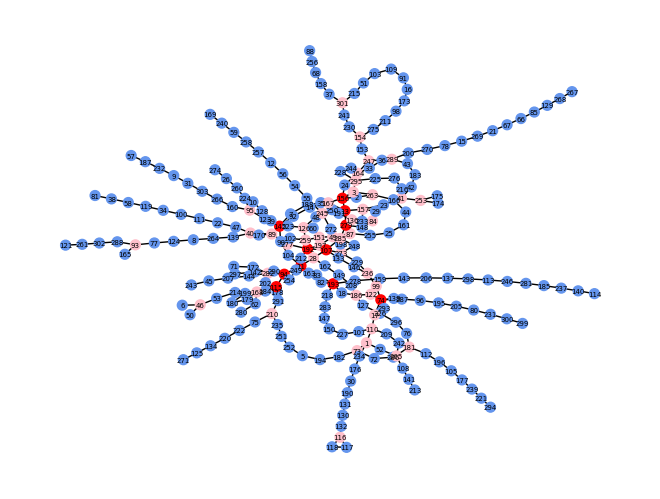

In [459]:
grafo.plot(50,5)

In [460]:
class FiboNode:
    def __init__(self, parent , val):
        self.value = val
        self.parent : FiboNode = parent
        self.child = None
        self.left = None
        self.right = None
        self.degree = 0
        self.mark = False

class FibonacciHeap:
    def __init__(self):
        self.rootList=[]


### Questao 1. Implemente o Algoritmo de Dijkstra usando uma Binary Heap ou Fibonacci Heap como estrutura de dados auxiliar

In [461]:
def dijkstras(g : Grafo, origin : int):
    vertices = g.vertices
    dictionary = {}
    priority_queue = [origin]
    for v in vertices:
        if v.ID == origin:
            dictionary[str(v)] = {'Distance':0, 'Previous':None}
        else:
            dictionary[str(v)] = {'Distance':math.inf, 'Previous':None}

    while priority_queue:
        exploring : Vertice = g.getVertice(heapq.heappop(priority_queue))
        neighbors = g.getNextNodes(exploring.ID)
        for identifier,w in neighbors.items():
            newDistance = round(dictionary[str(exploring)]['Distance'] + w, 3)
            prevDistance = dictionary[identifier]['Distance']
            if newDistance < prevDistance:
                dictionary[str(identifier)] = {'Distance':newDistance, 'Previous':exploring.val()}
                heapq.heappush(priority_queue, int(identifier))
    return dictionary

def dijkstras_path(g, origin:int, dest:int):
    d = dijkstras(g,origin)
    path=[]
    prev = str(dest)
    dist = d[prev]['Distance']
    while prev is not None:
        path.append(int(prev))
        prev = d[str(prev)]['Previous']
    if len(path) <= 1:
        return None,0
    return path[::-1],dist


In [462]:
d = dijkstras(grafo,Vertice(103))

[140, 237, 185, 281, 246, 113, 298, 137]


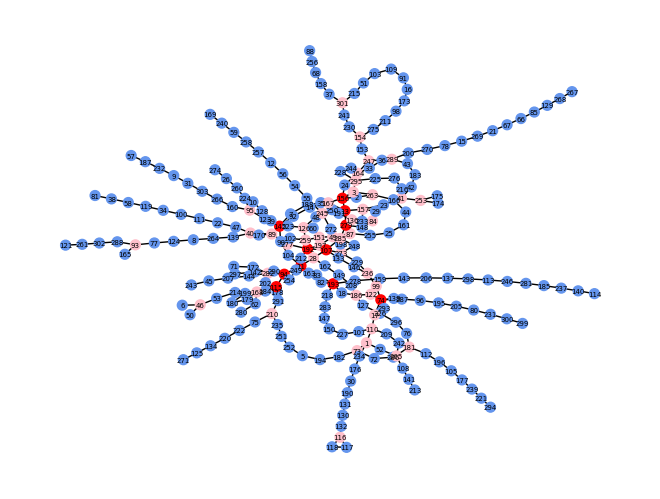

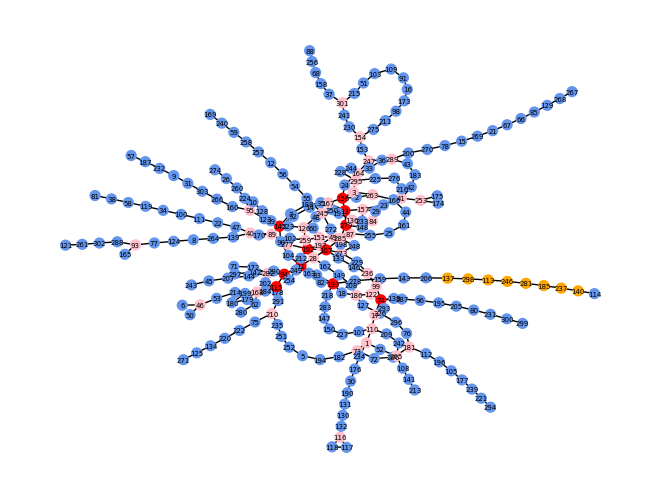

In [463]:
path = dijkstras_path(grafo,Vertice(103), Vertice(221))
print(path[0])
grafo.plot(50,5)
grafo.plot_path(path[0],50,5)

### Questao 2. Implemente o algoritmo de Yen para determinar os k caminhos mais curtos entre 2 pontos

In [464]:
def Yen(og : Grafo, K, org, dest):

    dPath, dCost = dijkstras_path(og,org,dest)
    Shortest = [(dPath,dCost)]
    PotentialShortest = []
    g = copy.deepcopy(og)

    for k in range(1,K):
        for j in range(len(Shortest[k-1][0]) - 2):
            spurNode = Shortest[-1][0][j]
            rootPath= Shortest[-1][0][:j]
            rootPathCost = og.getDistance(rootPath + [spurNode])
            for p in Shortest:
                if rootPath == p[0][:j]:
                    g.removeAresta(p[0][j],p[0][j+1])
                    g.removeAresta(p[0][j+1],p[0][j])

            for node in rootPath:
                if node != spurNode:
                    inc = g.getVertice(node).incoming
                    for a in inc:
                        g.removeAresta(a.origin,a.destination)
                    out = g.getVertice(node).outgoing
                    for a in out:
                        g.removeAresta(a.origin,a.destination)

            spurPath,spurPathCost = dijkstras_path(g,spurNode,dest)
            if spurPath is None:
                continue

            totalPath = rootPath + spurPath
            totalPathCost = rootPathCost + spurPathCost
            PotentialShortestPath = [e[0] for e in PotentialShortest]
            ShortestPath = [e[0] for e in Shortest]
            if totalPath not in PotentialShortestPath and totalPath not in ShortestPath:
                PotentialShortest.append((totalPath,totalPathCost))

            g = copy.deepcopy(og)
        if len(PotentialShortest) <= k-1:
            break;

        PotentialShortest = sorted(PotentialShortest, key= lambda x: x[1])
        Shortest.append(PotentialShortest[k-1])

    return [e for e in Shortest]

In [468]:
y = Yen(grafo, 5, 109,5)
for path in y:
    print(path)


([109, 91, 16, 173, 98, 211, 275, 154, 153, 247, 164, 24, 156, 13, 279, 285, 248, 273, 229, 236, 99, 74, 17, 110, 1, 73, 182, 194, 5], 58.68)
([109, 91, 16, 173, 98, 211, 275, 154, 153, 247, 164, 24, 156, 13, 279, 285, 248, 273, 229, 236, 99, 74, 293, 17, 110, 1, 73, 182, 194, 5], 58.379999999999995)
([109, 91, 16, 173, 98, 211, 275, 154, 153, 247, 164, 24, 156, 13, 157, 233, 279, 285, 248, 273, 229, 236, 99, 74, 17, 110, 1, 73, 182, 194, 5], 58.769999999999996)
([109, 91, 16, 173, 98, 211, 275, 154, 153, 247, 164, 24, 156, 13, 157, 233, 279, 285, 248, 273, 229, 236, 99, 74, 17, 110, 1, 73, 182, 194, 5], 58.769999999999996)
([109, 103, 51, 215, 301, 241, 230, 154, 153, 247, 164, 24, 156, 13, 279, 285, 248, 273, 229, 236, 99, 74, 17, 110, 1, 73, 182, 194, 5], 58.97)


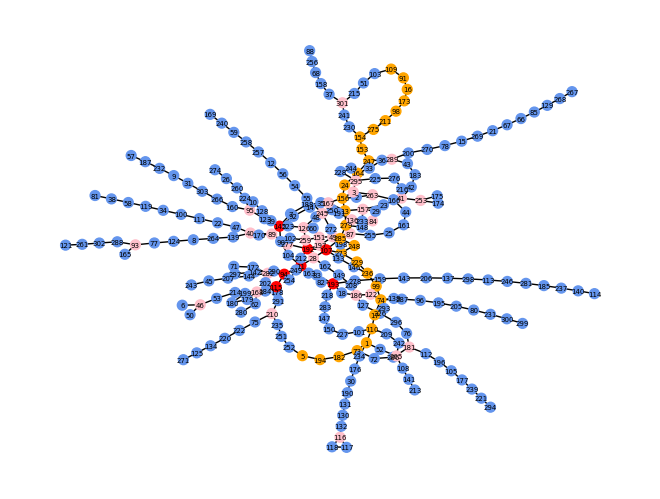

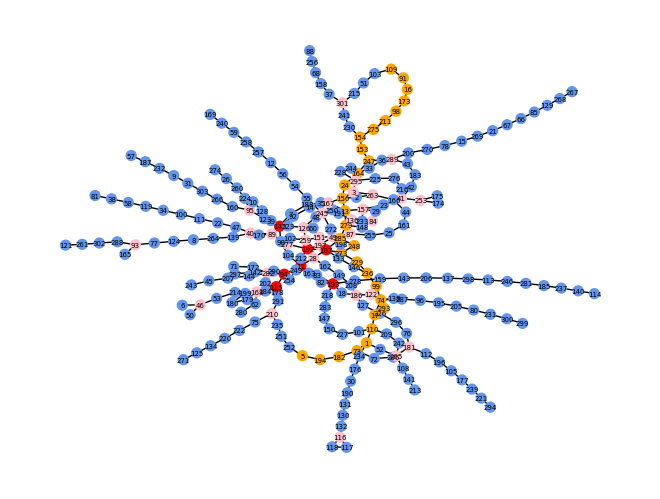

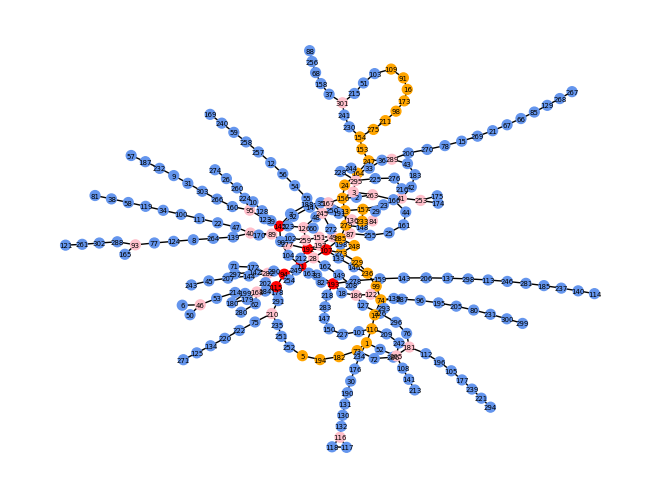

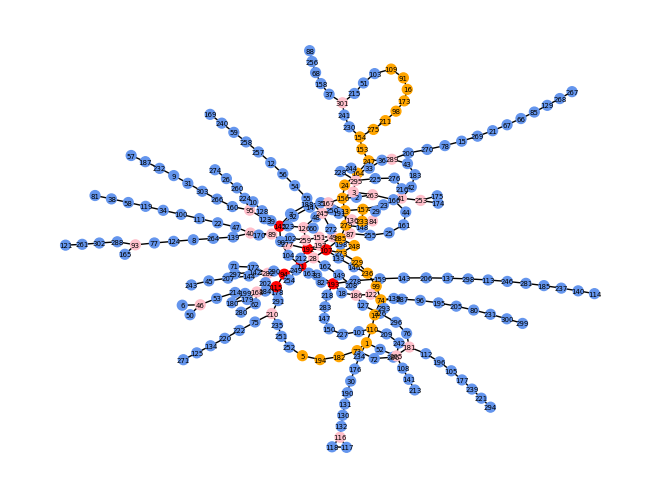

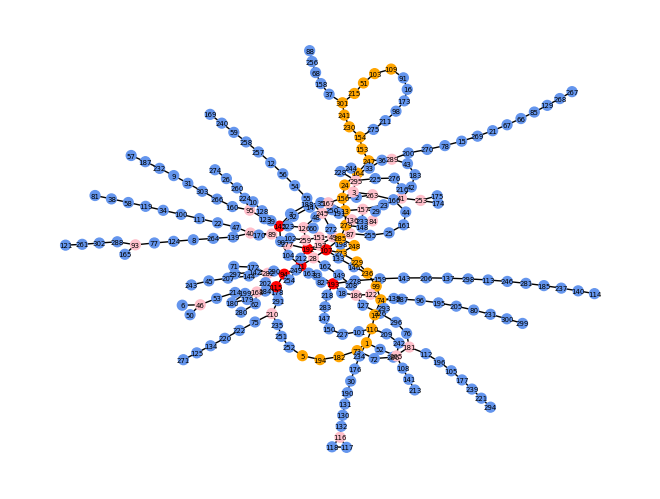

In [469]:
for path in y:
    grafo.plot_path(path[0],50,5)

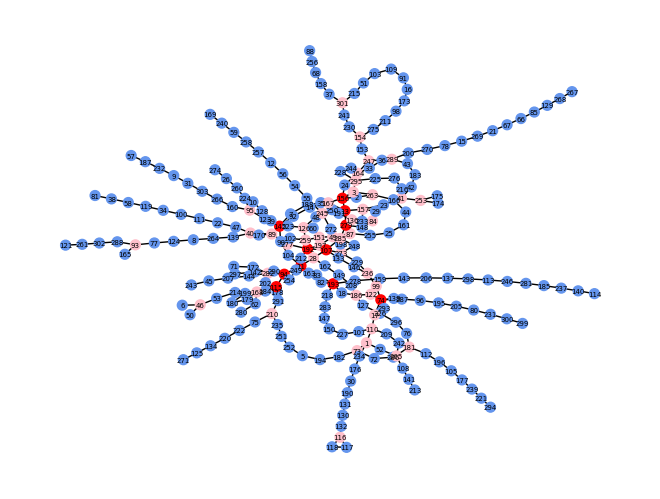

([88, 256, 68, 158, 37, 301, 215, 51, 103, 109], 20.05)
([88, 256, 68, 158, 37, 301, 241, 230, 154, 275, 211, 98, 173, 16, 91, 109], 32.06)
([88, 256, 68, 158, 37, 301, 215, 301, 241, 230, 154, 275, 211, 98, 173, 16, 91, 109], 36.27)
